In [73]:
#FIN 3080 Assinment 1 CAPM

# input data
single<-read.csv('TRD_Mnth.csv', header = TRUE)
market<-read.csv('TRD_Mont.csv', header = TRUE)
nrrate<-read.csv('TRD_Nrrate.csv', header = TRUE)
index<-read.csv('TRD_Index.csv', header = TRUE)

In [2]:
head(single)

#Stkcd [证券代码] - 以上交所、深交所公布的证券代码为准
#Trdmnt [交易月份] - 以YYYY-MM表示
#Msmvosd [月个股流通市值] - 个股的流通股数与月收盘价的乘积。 A股以人民币元计，上海B以美元计，深圳B以港币计，注意单位是千
#Mretnd [不考虑现金红利再投资的月个股回报率] - 字段说明见“回报率计算方法”
#Markettype [市场类型] - 1=上海A，2=上海B，4=深圳A，8=深圳B,  16=创业板

Stkcd,Trdmnt,Msmvosd,Msmvttl,Mretnd,Markettype
1,Jan-10,63453280,67387913,-0.109561,4
1,Feb-10,65646365,69716988,0.034562,4
1,Mar-10,67839451,72046063,0.033408,4
1,Apr-10,60119789,63847718,-0.113793,4
1,May-10,51201241,54376145,-0.148346,4
1,Jun-10,54374987,61022591,0.000000,4


In [3]:
head(market)

#Markettype [市场类型] - 1=上海A，2=上海B，4=深圳A，8=深圳B,  16=创业板
#Trdmnt [交易月份] - 以YYYY-MM表示
#Mretmdos [不考虑现金红利再投资的月市场回报率(流通市值加权平均法)] - 字段说明见“回报率计算方法”
#Mretnd [不考虑现金红利再投资的月市场回报率] - 上月和今月皆有有效交易的公司


Markettype,Trdmnt,Mretmdos,Mmvosd
16,Jan-10,-0.129531,35060865
2,Jan-10,-0.038520,11859032
1,Jan-10,-0.090872,10906560891
8,Jan-10,-0.051655,98630084
4,Jan-10,-0.063980,3331916429
16,Feb-10,0.113494,50499116


In [4]:
head(nrrate)
# we just simply use the converted monthly risk free rate from the websits
# For those months that nrrate variated during the month, we select the rate which occupies the larger proportion of the month (larger than 15 days)

#Clsdt    [Date]
#Nrrdata [无风险利率(%)] - 
#Nrrmtdt [月度化无风险利率(%)] - 根据复利计算方法，将年度的无风险利率转化为月度数据


Clsdt,Nrrdata,Nrrmtdt
2010/1/1,2.25,0.1856
2010/1/2,2.25,0.1856
2010/1/3,2.25,0.1856
2010/1/4,2.25,0.1856
2010/1/5,2.25,0.1856
2010/1/6,2.25,0.1856


In [5]:
head(index)

#Indexcd [指数代码] - 000001：上证综合指数；000002：上证综合A股指数；000003：上证综合B股指数；399106：深证综合指数；399107：深证综合A股指数；399108：深证综合B股指数；399001：深证成份指数；000010：上证180；399004：深证100；000300：沪深300；000902：中证流通；000903：中证100；399903：中证100；399329：中小板指；000020上证中型企业综合指数
#Trddt [交易日期] - 以YYYY-MM-DD表示
#Loindex [最低指数] - 每日交易中的最低一条指数
#Clsindex [收盘指数] - 每日交易中的最后一条指数
#Retindex [指数回报率] - 字段说明见“回报率计算方法”


Indexcd,Trddt,Opnindex,Clsindex,Retindex
1,2010/1/4,3289.750,3243.760,-0.010185
1,2010/1/5,3254.468,3282.179,0.011844
1,2010/1/6,3277.517,3254.215,-0.008520
1,2010/1/7,3253.991,3192.776,-0.018880
1,2010/1/8,3177.259,3195.997,0.001009
1,2010/1/11,3301.611,3212.750,0.005242


In [13]:
# convert the stock code from numeric to string
single$Stkcd<-as.factor(single$Stkcd)

# convert the date of transaction from factor to string 
single$Trdmnt<-as.character(single$Trdmnt)
nrrate$Clsdt<-as.character(nrrate$Clsdt)


In [61]:
# create function to convert Month abbr into number, since my R in my labtop cannot recognize these abbr

install.packages('zoo')
install.packages('stringi')
library(zoo)
library(stringi)

datefunc<-function(a){
  a1<-gsub('Jan','01',a)
  a2<-gsub('Feb','02',a1)
  a3<-gsub('Mar','03',a2)
  a4<-gsub('Apr','04',a3)
  a5<-gsub('May','05',a4)
  a6<-gsub('Jun','06',a5)
  a7<-gsub('Jul','07',a6)
  a8<-gsub('Aug','08',a7)
  a9<-gsub('Sep','09',a8)
  a10<-gsub('Oct','10',a9)
  a11<-gsub('Nov','11',a10)
  a12<-gsub('Dec','12',a11)
  return(a12)
}

In [74]:
# Furthur convert the date of transaction into date format
# insert 20 before the year value
stri_sub(single$Trdmnt,5,4) <- '20'

# create 01 to indicate date (will not be used in the analysis part, simply create it to polish the format)
stri_sub(single$Trdmnt,1,0) <- '01-'

# convert Month abbr into numeric and convert the data into Date 
single$Trdmnt<-datefunc(single$Trdmnt)
cc<-as.Date(single$Trdmnt,format = "%d-%m-%Y")
single$Trdmnt<-cc

In [75]:
head(single$Trdmnt)

[1] "2010-01-01" "2010-02-01" "2010-03-01" "2010-04-01" "2010-05-01"
[6] "2010-06-01"

In [76]:
## Q1

# Start playing with data for Index, we select 上证100 as the index which will be compared with market return we claculated

# Shangzheng 100 is selected, its code is 1
SZ_zong<- subset(index,Indexcd == '1')
SZ_zong$Trddt<-as.Date(SZ_zong$Trddt, format = '%Y/%m/%d')

# Extract month and year number

SZ_zong$year<- substr(SZ_zong$Trddt,1,4)
SZ_zong$mon<- substr(SZ_zong$Trddt,6,7)

# pick up all stock transaction data for Shanghai A market and Shenzhen A market
SZH_A<-subset(single,Markettype == 4|Markettype == 1)

In [77]:
# Assign risk free rate according to different month

for (i in 1:nrow(SZH_A)){
  if (SZH_A$Trdmnt[i] <= '2010-10-19') {SZH_A$nrrate[i]<- 0.1856
  } else if (SZH_A$Trdmnt[i] <= '2010-12-25') {SZH_A$nrrate[i]<- 0.2060
  } else if (SZH_A$Trdmnt[i] <= '2011-01-31') {SZH_A$nrrate[i]<- 0.2263
  } else if (SZH_A$Trdmnt[i] <= '2011-03-31') {SZH_A$nrrate[i]<- 0.2466
  } else if (SZH_A$Trdmnt[i] <= '2011-06-30') {SZH_A$nrrate[i]<- 0.2669
  } else if (SZH_A$Trdmnt[i] <= '2012-05-31') {SZH_A$nrrate[i]<- 0.2871
  } else if (SZH_A$Trdmnt[i] <= '2012-06-30') {SZH_A$nrrate[i]<- 0.2669
  } else {SZH_A$nrrate[i]<- 0.2466}
}

In [78]:
head(SZH_A)
head(SZ_zong)

Stkcd,Trdmnt,Msmvosd,Msmvttl,Mretnd,Markettype,nrrate
1,2010-01-01,63453280,67387913,-0.109561,4,0.1856
1,2010-02-01,65646365,69716988,0.034562,4,0.1856
1,2010-03-01,67839451,72046063,0.033408,4,0.1856
1,2010-04-01,60119789,63847718,-0.113793,4,0.1856
1,2010-05-01,51201241,54376145,-0.148346,4,0.1856
1,2010-06-01,54374987,61022591,0.000000,4,0.1856


Indexcd,Trddt,Opnindex,Clsindex,Retindex,year,mon
1,2010-01-04,3289.750,3243.760,-0.010185,2010,01
1,2010-01-05,3254.468,3282.179,0.011844,2010,01
1,2010-01-06,3277.517,3254.215,-0.008520,2010,01
1,2010-01-07,3253.991,3192.776,-0.018880,2010,01
1,2010-01-08,3177.259,3195.997,0.001009,2010,01
1,2010-01-11,3301.611,3212.750,0.005242,2010,01


In [80]:
# Create year and month character for later loop

year_n <- as.character(c(2010:2013))
mon_n<- c('01','02','03','04','05','06','07','08','09','10','11','12')
# since we are doing a double loop here, a line parameter is created to ensure the outcome would be writtern on the corret row (from 1 to 48)
k<- 1

In [81]:

WRT<- matrix(0,48,3)
for (i in 1:4){
  for (j in 1:12){
    # pick up stocks that were in the data in the particular year and month
    tmp1<- subset(SZH_A,substr(SZH_A$Trdmnt,1,4) == year_n[i])
    tmp<-na.omit(subset(tmp1,substr(tmp1$Trdmnt,6,7) == mon_n[j])) # omit data that has NA for monthly return
    WRT[k,1]<- weighted.mean(tmp[,5],tmp[,3])
    
    # Calculated Monthly Shangzheng 100 return based on the closed index of the last day of the month and the opened index in the first day of the month
    SZzongtmp1 <-subset(SZ_zong,year == year_n[i])
    SZzongtmp <-subset(SZzongtmp1,mon == mon_n[j])
    WRT[k,2] <- log(SZzongtmp[nrow(SZzongtmp),4]/SZzongtmp[1,3])
    
    # also imput monthly risk free rate
    WRT[k,3] <- 0.01*mean(tmp[,7])
    k<-k+1
  }
}

In [83]:
# The first col is the market return we calculated 
# The second col is the monthly return for ShangZheng100
# The third row is the monthly risk free rate
head(WRT)

-0.07828813,-0.09577500,0.001856
0.03627058,0.02339417,0.001856
0.02880245,0.01689890,0.001856
-0.06862893,-0.08071982,0.001856
-0.07675850,-0.08473042,0.001856
-0.07018960,-0.07213263,0.001856


In [84]:
cor(WRT[,1],WRT[,2])

[1] 0.9876382

In [87]:
## Q2
# We firstly calculate the average volume of circulation to determine the size of companies 

# Exctract the unique stock codes
index_uni<-as.vector(unique(single$Stkcd))
avg_value<-matrix(0,nrow = length(unique(single$Stkcd)),ncol = 4)

for (i in 1:2589){
  a<-index_uni[i]
  tmp<-subset(single,Stkcd == a)  
  avg_value[i,2]<-mean(tmp$Msmvosd) # avg of circulation value
  avg_value[i,1]<-a # stock code
  avg_value[i,3]<-mean(tmp$Msmvttl) # avg of total value
  avg_value[i,4]<-mean(tmp$Markettype) # market type
  
}
avg_value<-as.data.frame(avg_value, stringsAsFactors = FALSE)
colnames(avg_value) <- c("Stkcd", "avg_circu",'avg_total','mkt_type')
avg_value$avg_circu<-as.numeric(avg_value$avg_circu)
avg_value$avg_total<-as.numeric(avg_value$avg_total)

SZ1<- subset(avg_value,mkt_type == 1|mkt_type == 4) # Shanghai A market and Shenzhen A market are desired

In [124]:
head(SZ1) # avg cir_vlaue for stocks in Shanghai A market and Shenzhen A

subset(SZ1,SZ1$Stkcd =='600519') # large company
subset(SZ1,SZ1$Stkcd =='2097') # medium company
subset(SZ1,SZ1$Stkcd =='678') # small company

Stkcd,avg_circu,avg_total,mkt_type
1,54219084.1,78376913.1,4
2,85158903.0,85342924.8,4
4,858749.8,880147.1,4
5,3212424.1,3214500.4,4
6,5508234.3,5616973.6,4
7,2068392.5,2460077.8,4


,Stkcd,avg_circu,avg_total,mkt_type
2008,600519,186369394,186369394,1


,Stkcd,avg_circu,avg_total,mkt_type
568,2097,3206112,4452236,4


,Stkcd,avg_circu,avg_total,mkt_type
242,678,1706971,1812814,4



Call:
lm(formula = V1 ~ V2, data = big_reg1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.208795 -0.058587  0.004903  0.052446  0.261799 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0009259  0.0130251  -0.071    0.944
V2           0.2517936  0.2155506   1.168    0.249

Residual standard error: 0.09024 on 46 degrees of freedom
Multiple R-squared:  0.02881,	Adjusted R-squared:  0.007697 
F-statistic: 1.365 on 1 and 46 DF,  p-value: 0.2488


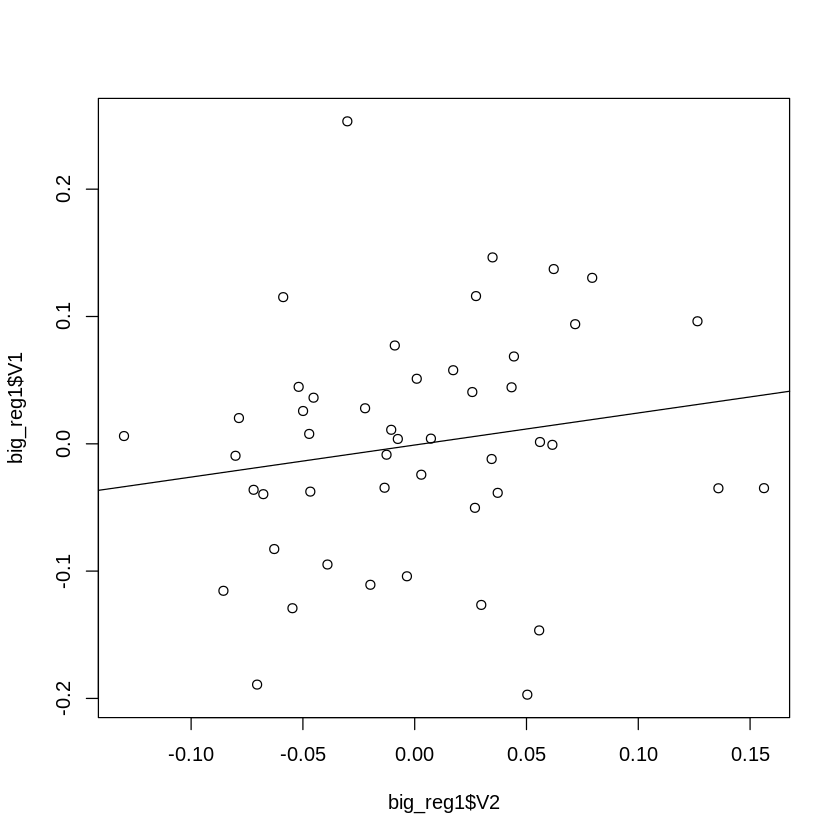

In [98]:
## big company we select stock 600159
big_stock <- subset(SZH_A,SZH_A$Stkcd =='600519')
big_reg<-matrix(0,48,2)
big_reg[,1]<-big_stock$Mretnd-0.01*big_stock$nrrate
big_reg[,2]<-WRT[1:48,1]-WRT[1:48,3]
big_reg1<-as.data.frame(big_reg)
lm_big<-lm(V1~V2, data = big_reg1)


summary(lm_big)

plot(big_reg1$V2,big_reg1$V1)
abline(lm_big)


Call:
lm(formula = V1 ~ V2, data = medium_reg1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16667 -0.03659 -0.01474  0.02699  0.22499 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.008263   0.010516  -0.786    0.436    
V2           1.465225   0.185615   7.894 4.92e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.072 on 45 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5807,	Adjusted R-squared:  0.5713 
F-statistic: 62.31 on 1 and 45 DF,  p-value: 4.921e-10


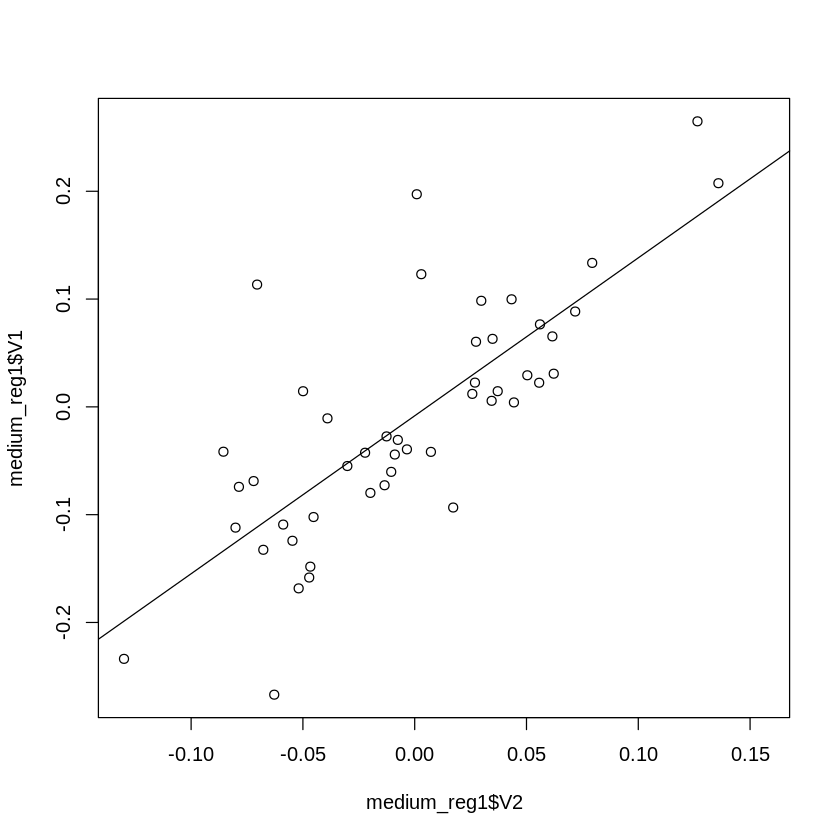

In [100]:
## medium company we select stock 2097

medium_stock <- subset(SZH_A,SZH_A$Stkcd =='2097')
medium_reg<-matrix(0,48,2)
medium_reg[,1]<-medium_stock$Mretnd-0.01*medium_stock$nrrate
medium_reg[,2]<-WRT[1:48,1]-WRT[1:48,3]
medium_reg1<-as.data.frame(medium_reg)
lm_medium<-lm(V1~V2, data = medium_reg1)


summary(lm_medium)
plot(medium_reg1$V2,medium_reg1$V1)
abline(lm_medium)


Call:
lm(formula = V1 ~ V2, data = small_reg1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.236636 -0.077426  0.005432  0.087836  0.168007 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.006853   0.015416  -0.445    0.659
V2           0.188439   0.255351   0.738    0.464

Residual standard error: 0.1045 on 44 degrees of freedom
Multiple R-squared:  0.01223,	Adjusted R-squared:  -0.01022 
F-statistic: 0.5446 on 1 and 44 DF,  p-value: 0.4645


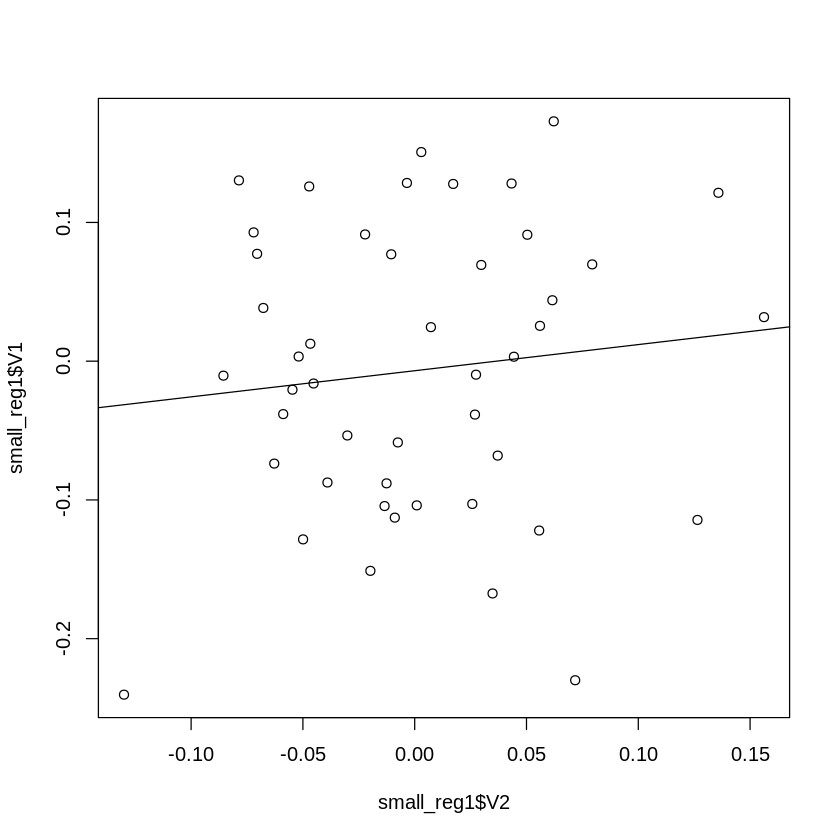

In [101]:
## small company we select stock 678
small_stock <- subset(SZH_A,SZH_A$Stkcd =='678')
small_reg<-matrix(0,46,2)
small_reg[,1]<-small_stock$Mretnd-0.01*small_stock$nrrate
small_reg[,2]<-WRT[3:48,1]-WRT[3:48,3]
small_reg1<-as.data.frame(small_reg)
lm_small<-lm(V1~V2, data = small_reg1)


summary(lm_small)
plot(small_reg1$V2,small_reg1$V1)
abline(lm_small)

In [102]:
## Q3
# create ordered list of company based on thier average circumlation volume
stockcode_ranked<- SZ1[order(SZ1$avg_circu),1]
length(stockcode_ranked)

[1] 2126

In [103]:
# So we select approxiamately 212 stocks for each portfolio
portfolio1<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[1:213],]
portfolio2<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[214:426],]
portfolio3<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[427:639],]
portfolio4<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[640:852],]
portfolio5<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[853:1065],]
portfolio6<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[1066:1278],]
portfolio7<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[1279:1490],]
portfolio8<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[1491:1702],]
portfolio9<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[1703:1914],]
portfolio10<-SZH_A[SZH_A$Stkcd%in%stockcode_ranked[1915:2126],]

In [104]:

WR_table<-matrix(0,48,10)
l<-1
for (i in 1:10){
  portfolio<-eval(parse(text=paste0('portfolio',i)))
  for (j in 1:4){
    for (k in 1:12){
      po_month<-na.omit(subset(subset(portfolio,substr(Trdmnt,1,4) == year_n[j]),substr(Trdmnt,6,7) == mon_n[k]))
      WR_table[l,i]<- weighted.mean(po_month[,5],po_month[,3])
      l<-l+1
    }
  }
  l<-1
}

In [105]:
head(WR_table)

-0.02848218,-0.04325067,-0.04838756,-0.02570799,-0.02700023,-0.01900630,-0.00626377,-0.01499132,-0.03492297,-0.10584473
0.05467146,0.07573734,0.06831885,0.08521615,0.07390290,0.07436224,0.07351117,0.06901173,0.03917417,0.02212530
0.14511374,0.06189379,0.06139921,0.05787325,0.04778377,0.03885341,0.02156169,0.02488697,0.01962698,0.02718792
-0.13705252,-0.09476340,-0.08322107,-0.07066816,-0.08305403,-0.07190772,-0.06393533,-0.05756242,-0.03679231,-0.07371631
-0.10456383,-0.08731764,-0.08334724,-0.09057127,-0.08904549,-0.08378062,-0.08761011,-0.07003559,-0.06542455,-0.07676024
-0.07082065,-0.08406339,-0.08783258,-0.10250281,-0.08705926,-0.11021204,-0.08727753,-0.09434198,-0.09197520,-0.05784219


In [107]:
corr_table<-cor(WR_table,WRT[,2])
corr_table

0.7957841
0.8341987
0.8578565
0.8664859
0.8803363
0.8952600
0.8822672
0.9047752
0.9163766
0.9683041


In [109]:
#deduct risk free rate and put the matrix into data frame for the convinence for later regression
aa<-WR_table-0.1*WRT[,3]
dat<-as.data.frame(aa)
# Input return from Shangzheng 100 into this data frame
dat$SZ_index<-WRT[,1]-WRT[,3]
head(dat)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,SZ_index
-0.02866778,-0.04343627,-0.04857316,-0.02589359,-0.02718583,-0.01919190,-0.00644937,-0.01517692,-0.03510857,-0.10603033,-0.08014413
0.05448586,0.07555174,0.06813325,0.08503055,0.07371730,0.07417664,0.07332557,0.06882613,0.03898857,0.02193970,0.03441458
0.14492814,0.06170819,0.06121361,0.05768765,0.04759817,0.03866781,0.02137609,0.02470137,0.01944138,0.02700232,0.02694645
-0.13723812,-0.09494900,-0.08340667,-0.07085376,-0.08323963,-0.07209332,-0.06412093,-0.05774802,-0.03697791,-0.07390191,-0.07048493
-0.10474943,-0.08750324,-0.08353284,-0.09075687,-0.08923109,-0.08396622,-0.08779571,-0.07022119,-0.06561015,-0.07694584,-0.07861450
-0.07100625,-0.08424899,-0.08801818,-0.10268841,-0.08724486,-0.11039764,-0.08746313,-0.09452758,-0.09216080,-0.05802779,-0.07204560



Call:
lm(formula = V1 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113051 -0.025599 -0.003424  0.023940  0.115425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007115   0.007354   0.967    0.338    
SZ_index    1.174140   0.121704   9.648 1.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05095 on 46 degrees of freedom
Multiple R-squared:  0.6692,	Adjusted R-squared:  0.6621 
F-statistic: 93.07 on 1 and 46 DF,  p-value: 1.258e-12


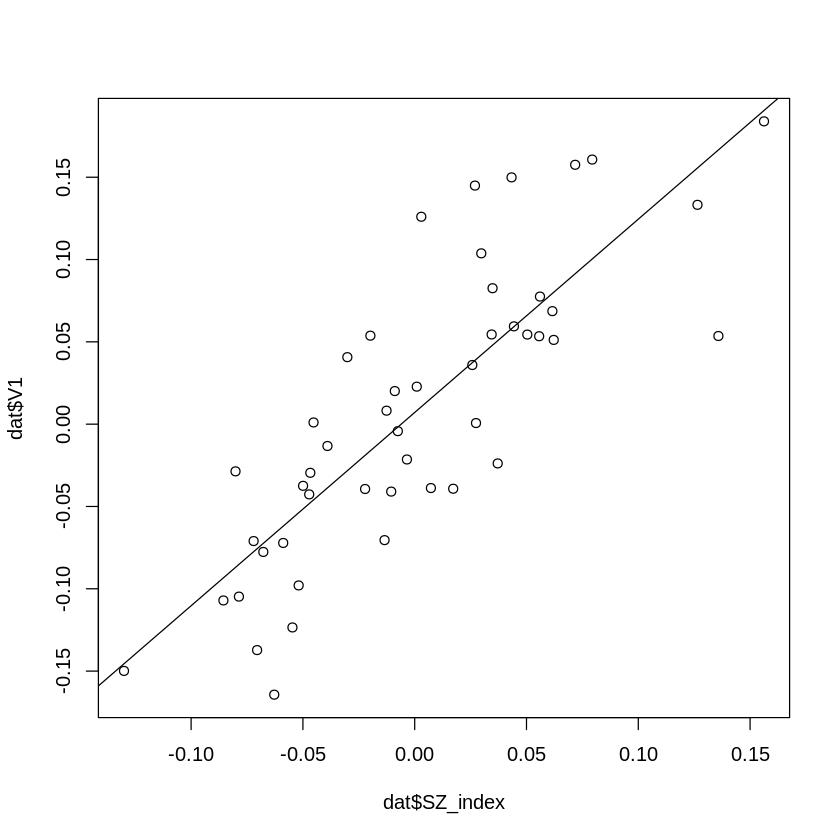

In [110]:
# portfolio 1 
lm1<-lm(V1~SZ_index, data = dat)
summary(lm1)
plot(dat$SZ_index,dat$V1)
abline(lm1)


Call:
lm(formula = V2 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.117403 -0.022549 -0.002517  0.029649  0.091818 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.010539   0.006268   1.681   0.0995 .  
SZ_index    1.183756   0.103723  11.413 5.17e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04342 on 46 degrees of freedom
Multiple R-squared:  0.739,	Adjusted R-squared:  0.7333 
F-statistic: 130.3 on 1 and 46 DF,  p-value: 5.166e-15


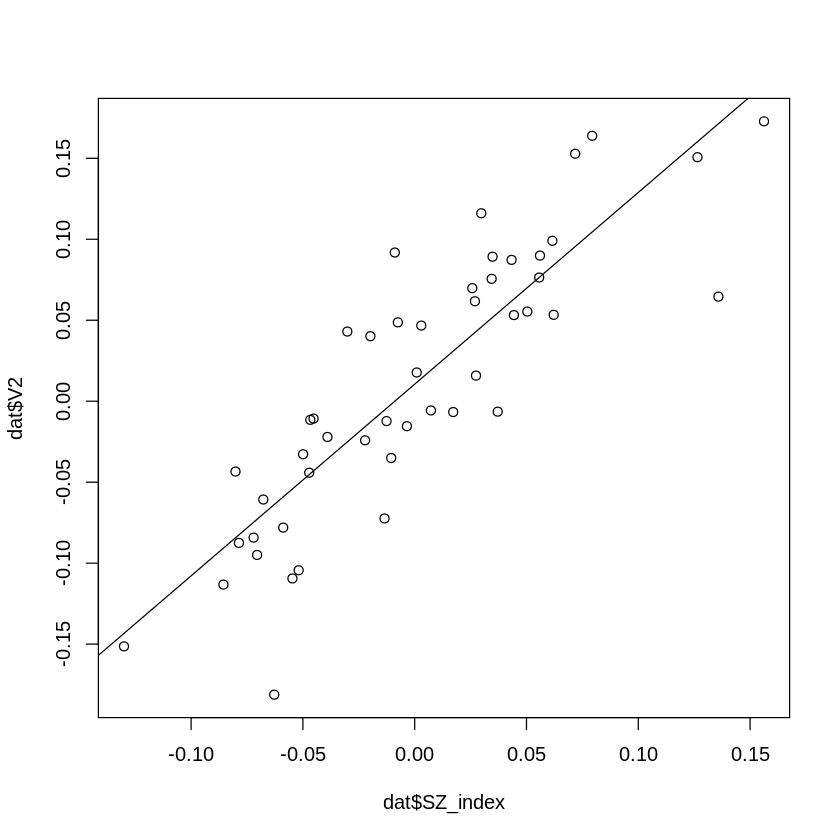

In [111]:
# portfolio 2 
lm2<-lm(V2~SZ_index, data = dat)
summary(lm2)
plot(dat$SZ_index,dat$V2)
abline(lm2)


Call:
lm(formula = V3 ~ SZ_index, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12287 -0.01908  0.00121  0.02734  0.06720 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007113   0.005617   1.266    0.212    
SZ_index    1.174462   0.092947  12.636   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03891 on 46 degrees of freedom
Multiple R-squared:  0.7763,	Adjusted R-squared:  0.7715 
F-statistic: 159.7 on 1 and 46 DF,  p-value: < 2.2e-16


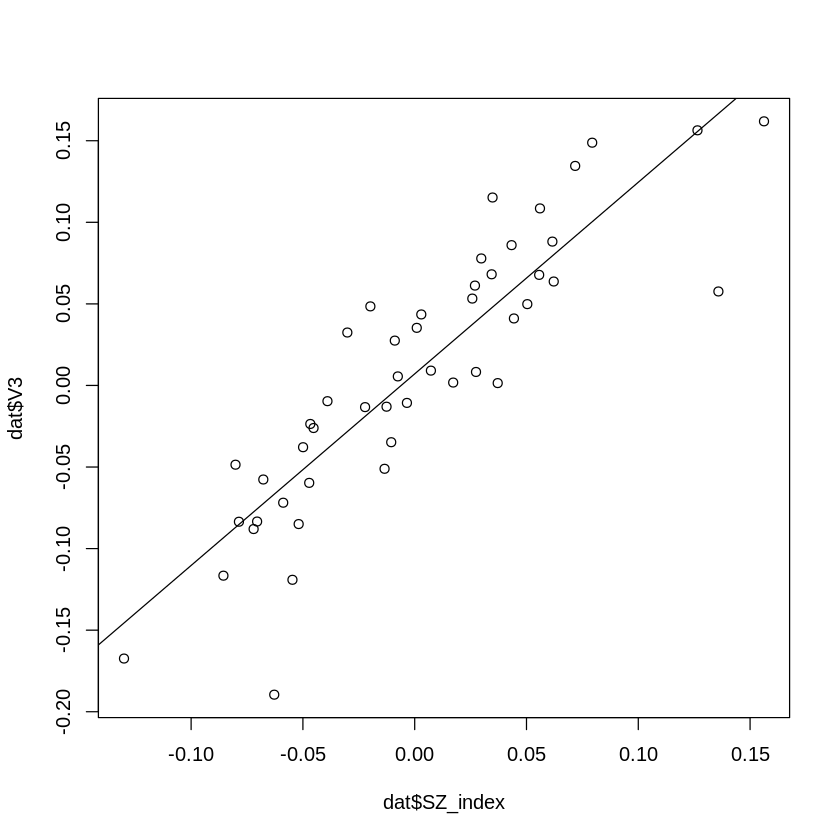

In [112]:
# portfolio 3
lm3<-lm(V3~SZ_index, data = dat)
summary(lm3)
plot(dat$SZ_index,dat$V3)
abline(lm3)


Call:
lm(formula = V4 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.108184 -0.022248  0.001689  0.026372  0.061087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.009395   0.005410   1.737   0.0892 .  
SZ_index    1.182166   0.089529  13.204   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03748 on 46 degrees of freedom
Multiple R-squared:  0.7912,	Adjusted R-squared:  0.7867 
F-statistic: 174.4 on 1 and 46 DF,  p-value: < 2.2e-16


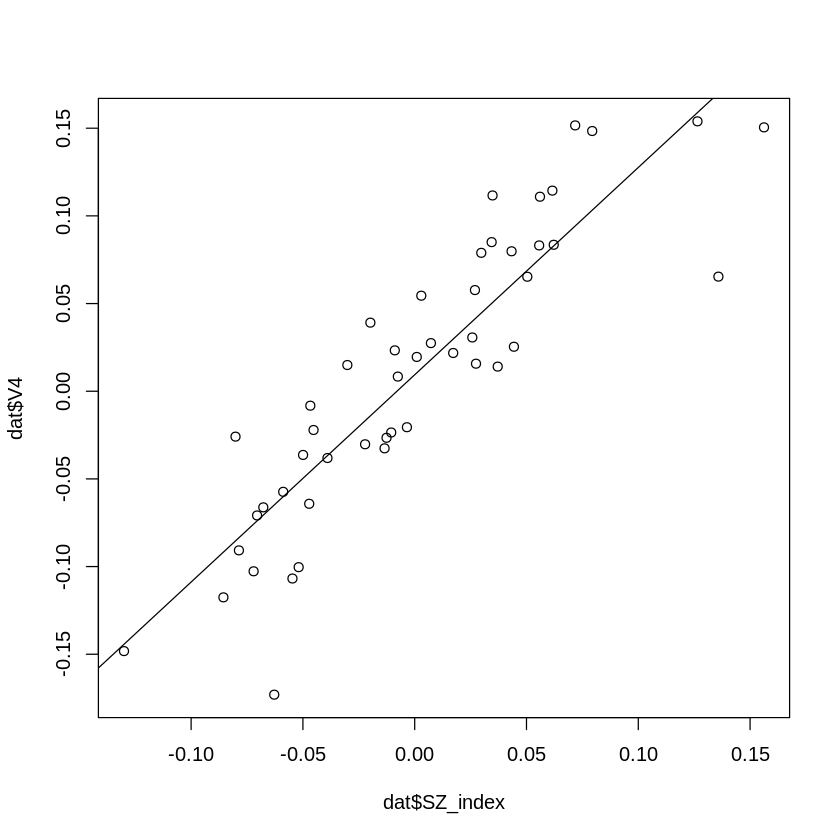

In [113]:
# portfolio 4
lm4<-lm(V4~SZ_index, data = dat)
summary(lm4)
plot(dat$SZ_index,dat$V4)
abline(lm4)


Call:
lm(formula = V5 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.091303 -0.020024 -0.002503  0.020936  0.061759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.009241   0.005116   1.806   0.0774 .  
SZ_index    1.221290   0.084671  14.424   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03545 on 46 degrees of freedom
Multiple R-squared:  0.8189,	Adjusted R-squared:  0.815 
F-statistic: 208.1 on 1 and 46 DF,  p-value: < 2.2e-16


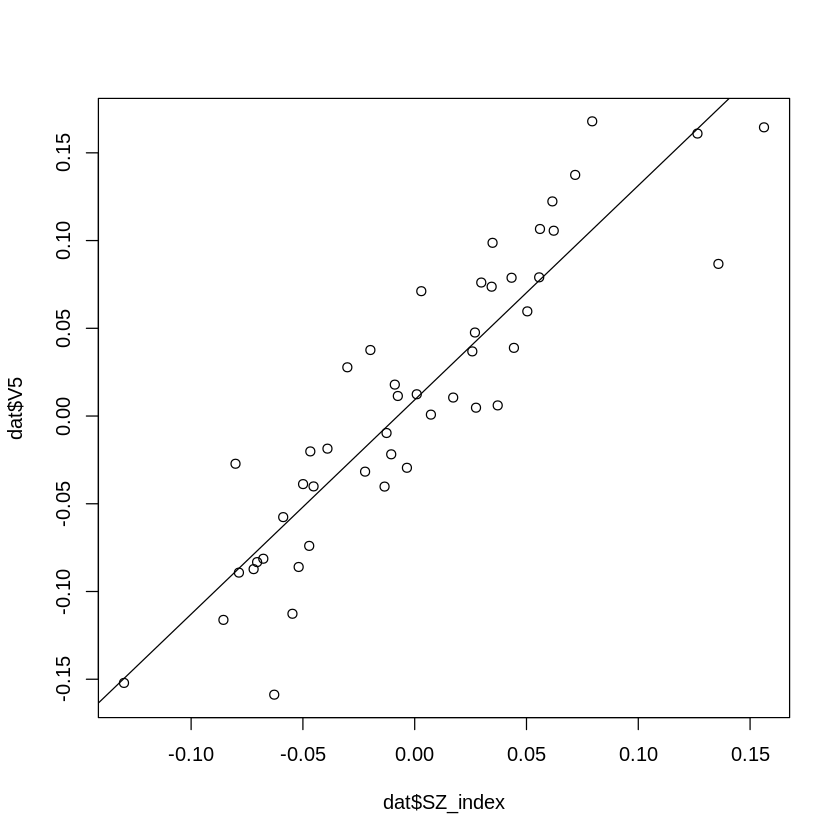

In [114]:
# portfolio 5
lm5<-lm(V5~SZ_index, data = dat)
summary(lm5)
plot(dat$SZ_index,dat$V5)
abline(lm5)


Call:
lm(formula = V6 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.098613 -0.024645  0.000309  0.022409  0.073860 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.008330   0.004797   1.737   0.0892 .  
SZ_index    1.264999   0.079386  15.935   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03323 on 46 degrees of freedom
Multiple R-squared:  0.8466,	Adjusted R-squared:  0.8433 
F-statistic: 253.9 on 1 and 46 DF,  p-value: < 2.2e-16


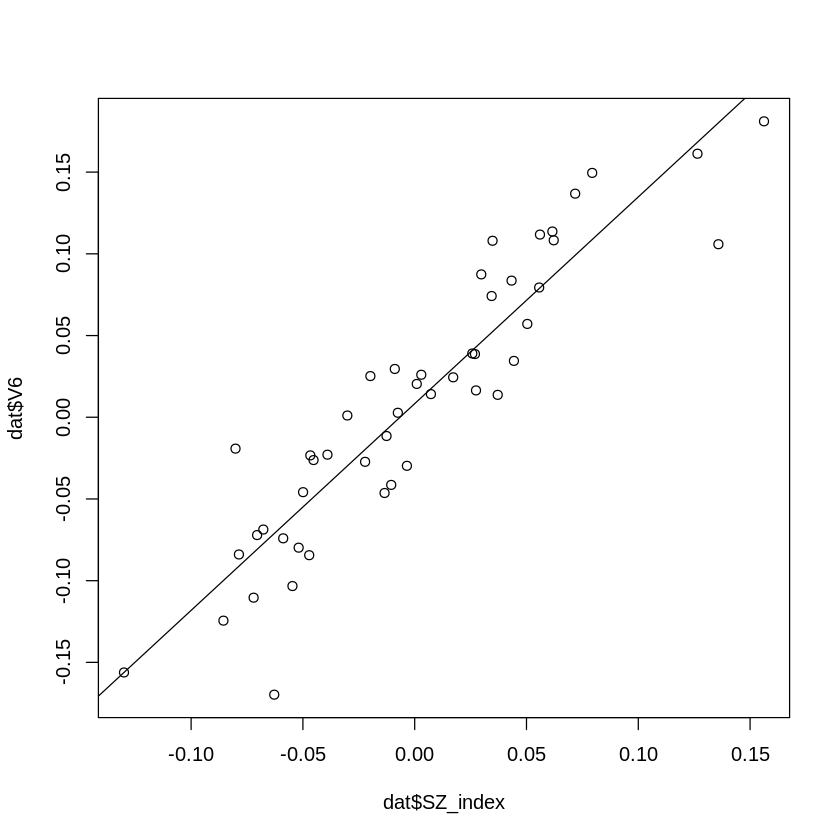

In [117]:
# portfolio 6
lm6<-lm(V6~SZ_index, data = dat)
summary(lm6)
plot(dat$SZ_index,dat$V6)
abline(lm6)


Call:
lm(formula = V7 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.083991 -0.019491 -0.000661  0.021720  0.082002 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007742   0.004720    1.64    0.108    
SZ_index    1.200253   0.078109   15.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0327 on 46 degrees of freedom
Multiple R-squared:  0.837,	Adjusted R-squared:  0.8334 
F-statistic: 236.1 on 1 and 46 DF,  p-value: < 2.2e-16


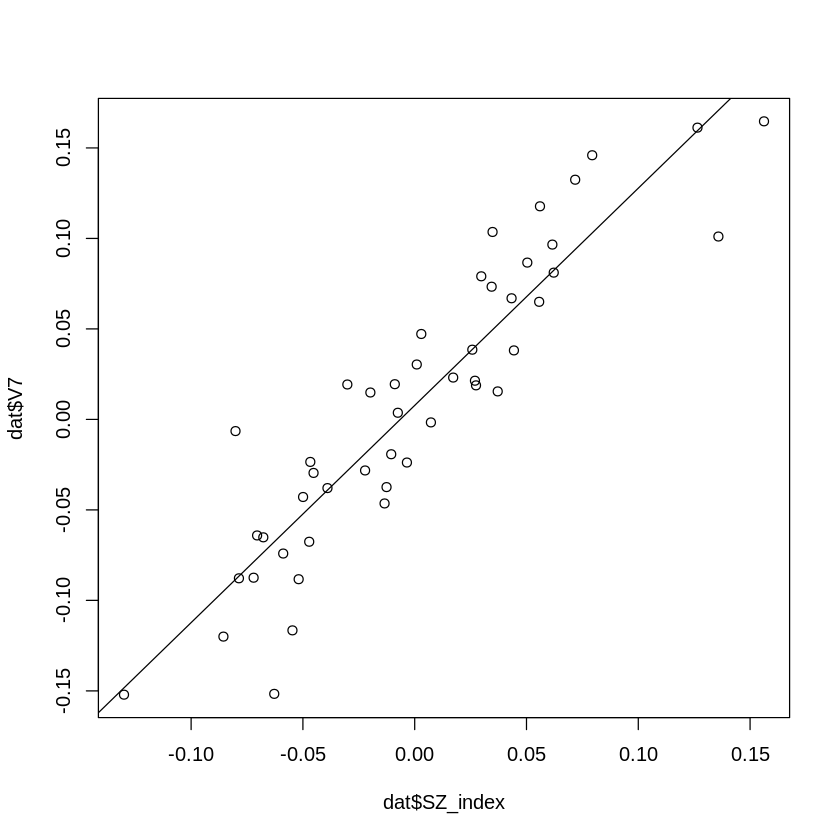

In [118]:
# portfolio 7
lm7<-lm(V7~SZ_index, data = dat)
summary(lm7)
plot(dat$SZ_index,dat$V7)
abline(lm7)


Call:
lm(formula = V8 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070434 -0.014691 -0.000295  0.016439  0.070895 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.006297   0.004013   1.569    0.123    
SZ_index    1.152536   0.066418  17.353   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02781 on 46 degrees of freedom
Multiple R-squared:  0.8675,	Adjusted R-squared:  0.8646 
F-statistic: 301.1 on 1 and 46 DF,  p-value: < 2.2e-16


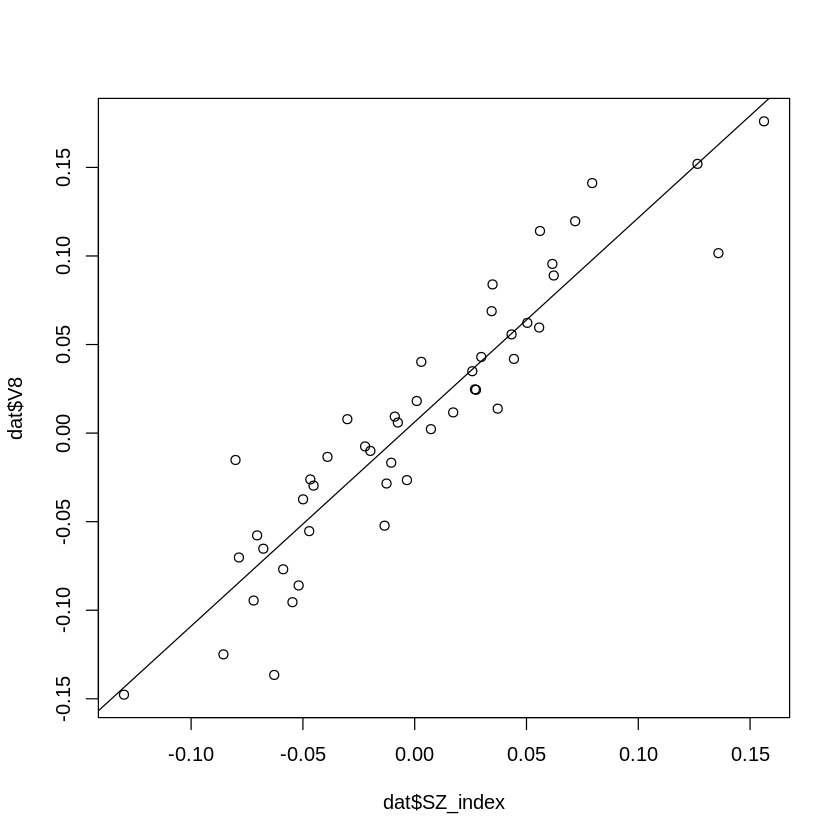

In [119]:
# portfolio 8
lm8<-lm(V8~SZ_index, data = dat)
summary(lm8)
plot(dat$SZ_index,dat$V8)
abline(lm8)


Call:
lm(formula = V9 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.053522 -0.015828 -0.002257  0.018552  0.051037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007721   0.003519   2.194   0.0333 *  
SZ_index    1.171221   0.058228  20.115   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02438 on 46 degrees of freedom
Multiple R-squared:  0.8979,	Adjusted R-squared:  0.8957 
F-statistic: 404.6 on 1 and 46 DF,  p-value: < 2.2e-16


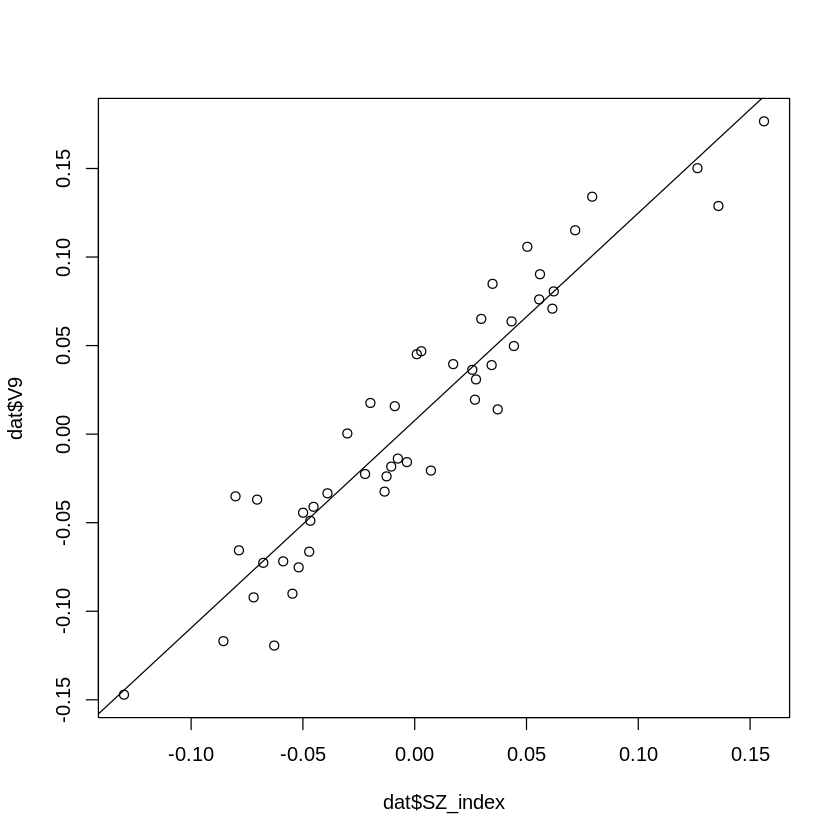

In [120]:
# portfolio 9
lm9<-lm(V9~SZ_index, data = dat)
summary(lm9)
plot(dat$SZ_index,dat$V9)
abline(lm9)


Call:
lm(formula = V10 ~ SZ_index, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032195 -0.008533  0.000161  0.009971  0.035462 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001356   0.002102  -0.645    0.522    
SZ_index     0.904364   0.034784  26.000   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01456 on 46 degrees of freedom
Multiple R-squared:  0.9363,	Adjusted R-squared:  0.9349 
F-statistic:   676 on 1 and 46 DF,  p-value: < 2.2e-16


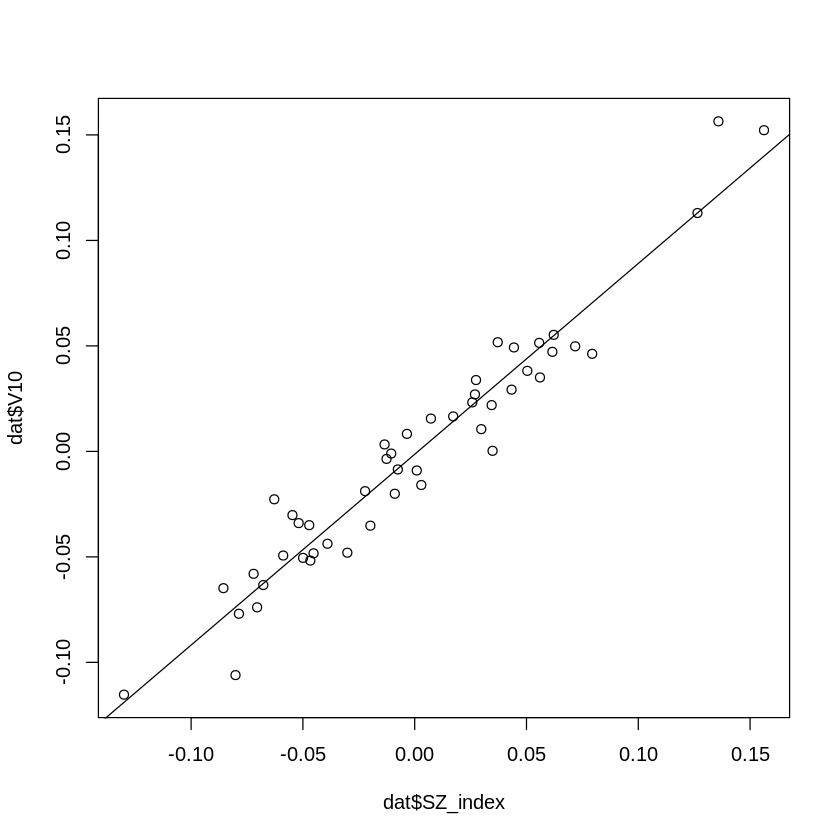

In [121]:
# portfolio 10
lm10<-lm(V10~SZ_index, data = dat)
summary(lm10)
plot(dat$SZ_index,dat$V10)
abline(lm10)